# Python code for Naive - Bayes Classifier

We'll do some cool stuff using what we've learned from the tutorial. You must've seen a spam sms in your phone. Those sms  contains promotions, ads, disguised links, phishing etc. Can we classify these sms from a text from your mom or other important ones using a machine learning classifier? If so, when a new sms comes, the classifier will decide whether it is a spam or ham and don't show notifications. Even we can set up an auto deletion for those sms. Sounds cool? 

Let's do it using our hero Naive - Bayes Classifier. By the way, Naive - Bayes is well-known for text classification because of the inherent behaviour of that problem as the features can be represented as individually. As we move on, things will be more lucid. 

## ML Experiment Pipeline

- Get the data
- Clean the data
- Representation of data
- Divide the data into training and testing data
- Train the model in training data
- Test the model using test data
- Find the accuracy of the model in test data

## Get the data

Get the [SMS Spam Collection Dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset) from [Kaggle](https://www.kaggle.com/). I've downloaded and extracted it to a .csv format.

In [1]:
import pandas as pd
sms_data = pd.read_csv("sms_data.csv", encoding="iso-8859-1")
print(sms_data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


## Clean the data

Data won't come to the way we want it to be. So let take the broom and clean it.

- Remove the numbers.
- Remove the [stop words in english](http://www.ranks.nl/stopwords).
    - [Some extremely common words which would appear to be of little value in helping us to take a decision](https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html).
    
- Remove the special characters.

We'll do the first cleaning, the last two will be done using `sklearn.feature_extraction.text.CountVectorizer`.

In [2]:
data_cleaned = sms_data.dropna(axis=1, how='any') #drop all the null columns
print(data_cleaned.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
data_cleaned.columns = ['Label', 'Text'] #name the columns
print(data_cleaned.head())

  Label                                               Text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [30]:
message_dict = {} # this will be a dictionary with keys as text and values as labels 
for i in range(len(data_cleaned)):
    message_dict[data_cleaned["Text"][i]] = data_cleaned["Label"][i]

labels = list(message_dict.values())

# converted the labels to numbers i.e. ham is 1, spam is 2
# this is required as the classifier cannot handle the raw string labels 
labels = [1 if x == "ham" else 2 for x in labels]


messages_temp = list(message_dict.keys())

In [5]:
# removing the digits

import re
messages = []
for msg in messages_temp:
    output = re.sub(r'\d+', ' ', msg) # Substitute the digits with a space
    output = re.sub(r"\s+", " ", output) # Substiture the multiple spaces with a single space
    output = output.strip() # Trim the trailing and preceeding spaces
    messages.append(output)

In [29]:
print("Cleaned messages")
print("=================\n")
for i in range(5):
    print(str(i+1) + ". " + messages[i])

Cleaned messages

1. Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
2. Ok lar... Joking wif u oni...
3. Free entry in a wkly comp to win FA Cup final tkts st May . Text FA to to receive entry question(std txt rate)T&C's apply over 's
4. U dun say so early hor... U c already then say...
5. Nah I don't think he goes to usf, he lives around here though


## Representation of Data 

Now ask yourself a question. Can you feed this data directly to classifier? Nope. None of the Machine Learning (ML) algorithms have the ability to use the raw data as inputs. We need to represent our data in a numerical form so that the ML algorithm can take it from there. So how we're going to represent it our sms? There are many representations in NLP to convert a text to a numerical vector. One of them is [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model). 

In Bag of Words model, we'll find the vocabulary of the text, then represent each word in the vocabulary with its frequency of occuring. 

For example,

Here are two simple text documents:

```
(1) John likes to watch movies. Mary likes movies too.
(2) John also likes to watch football games.
```

Vocabulary of this text chunk will be:
```
 "John"
 "likes"
 "to"
 "watch"
 "movies"
 "Mary"
 "too"
 "also"
 "football"
 "games"
```

Frequency of vocabulary:


| Word     | Frequency |
|----------|-----------|
| John     |     2     |
| likes    |     3     |
| to       |     2     |
| watch    |     2     |
| movies   |     2     |
| Mary     |     1     |
| too      |     1     |
| also     |     1     |
| football |     1     |
| games    |     1     |


Now the numerical representation of the a sample sentence will be:


| Sentence                       | John | likes | to | watch | movies | Mary | too | also | football | games |
|--------------------------------|------|-------|----|-------|--------|------|-----|------|----------|-------|
| Sleeba likes to watch football | 0    |  3    |  2 |  2    | 0      | 0    | 0   | 0    | 1        | 0     |


This is a matrix with dimensions `number of samples x number of features`, where 
- No. of samples = No. of sentences
- No. of features = No. of words in the vocabulary

NB: This one of way of doing it and it's easy. But, let it be in life or numerical representation of text, easy things yield no great results. There are great ways to represent text content like Word2Vec or Glove and you may go through that, but after completing this tutorial. :D

#### CountVectorizer

[CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) is a useful function provided by the python machine learning library [scikit-learn](http://scikit-learn.org/stable/index.html). Following processes happen during this step. 

- Tokenizing the text. — Vectorization and tokenizing
- Throw away some less important words. — stop word
- Throwing away words that occur way too often to be of any help in detecting relevant posts. — stemming
- Throwing away words that occur so seldom that there is only a small chance that they occur in future posts.
- Counting the remaining words.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=5, # minimum frequency for a word to be considered to vocabulary
                             ngram_range=(1, 1), # for tokenizing as ngrams, here we use 1-gram or a word 
                             stop_words="english", # strip out stop words while tokenizing
                            )
vect = vectorizer.fit_transform(messages) # the blackbox that help us doing everything listed above :P

In [8]:
print ("Total number of vocabulary: ", len(vectorizer.get_feature_names()))
print("\nSample of vocabulary")
print("=======================\n")

for i, value in enumerate(vectorizer.get_feature_names()):
    if i < 20:
        print(value)

Total number of vocabulary:  1400

Sample of vocabulary

abiola
able
abt
ac
acc
access
account
activate
actually
ad
add
added
address
admirer
advance
advice
aft
afternoon
aftr
age


In [9]:
num_samples, num_features = vect.shape
print("Total number of messages: ", num_samples)
print("Total number of features i.e. words in vocabulary: ", num_features)

Total number of messages:  5169
Total number of features i.e. words in vocabulary:  1400


## Divide the data into training and testing data

In [10]:
# Split the data into a training set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vect, labels, test_size=0.3, random_state=0)

## Train the model in training data

We're going to use the Multinomial Naive Bayes classifier for the implementation. Aah ! You got me. I didn't mention about the variations of Naive Bayes Classifier, did I? :D Don't worry a bit. Naive Bayes is what we've explained in the tutorial but for many other reasons, many smart people have extended and optimized Naive Bayes. [Read more about it here](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB). I bet you can easily catch up with the knowledge you've right now. 

In [11]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB() # initialize the Gaussian Naive Bayes.
# gnb.fit(X_train, y_train) # fit the model in training data

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB() # initialize multinomial naive bayes classifier
clf.fit(X_train, y_train) # fit the model in training data

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Test the model in test data

In [14]:
y_pred_mnb = clf.predict(X_test) 

## Accuracy of the model in test data

In [28]:
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, y_pred_mnb)
print("Accuracy of trained model in test data: ", result)

Accuracy of trained model in test data:  0.975499677627


Voila !!!!  

We're super cool. It's showing that, in the unseen data i.e. test data, classifier is able to classify spam or ham messages with an accuracy of $ \approx 98\% $. 

So, it is done. We've implemented out Naive Bayes Classifier to classify the spam/ham sms successfully. 
Go home and get some sleep. Come back tomorrow and do experiment, explore, intrepret and infer the experiment. Trust me, it's going to be a rollercoaster ride. :D

Happy learning !!

## Appendix 

** Plot the Confusion Matrix **

You can ignore this piece of code if it's hard to follow. I'm adding this appendix to interpret our result little deeper. So focus on that part. 

It's okay, if you don't know what a confusion matrix is. But it is not as confusing as it is named :D. For starters understand that, we need high numbers on diagonal cells of a confusion matrix, for the classifier to work well. :D  

There are topics called **Sensitivity** and **Specificity** which every Machine Learning enthusiast should know in detail. Since this tutorial is not covering that scope of subject, I'm leaving two links to read about it in detail.  
[link 1](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)  
[link 2](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

You can skip the following `plot_confusion_matrix` function code if you can follow. It's not going to affect the focus of this tutorial anyway.

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

%matplotlib inline


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.1   0.9 ]]


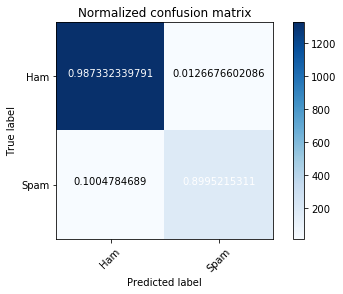

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_mnb)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
class_names = ["Ham", "Spam"]
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()